# Задание 1. Scipy - обрезка изображения.

/tmp/ipykernel_18496/2967247807.py:5: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


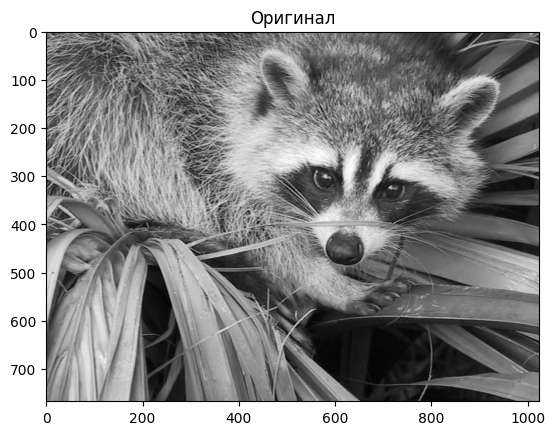

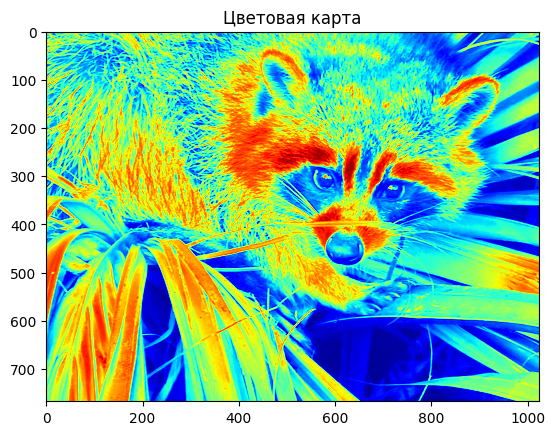

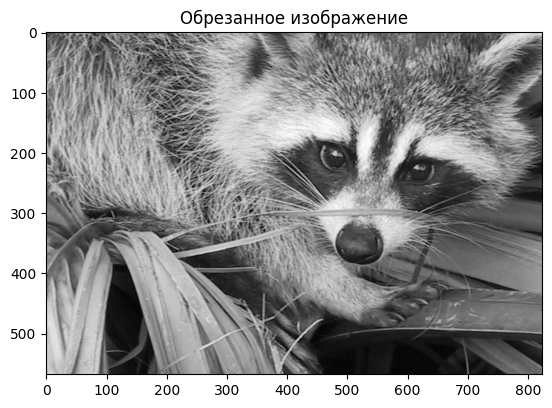

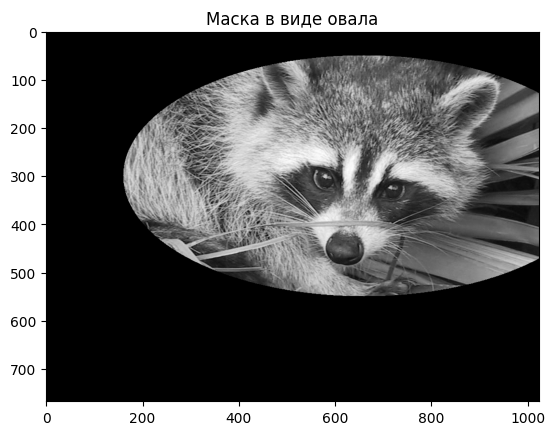

In [13]:
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np

face = misc.face(gray=True)

plt.imshow(face, cmap='gray')
plt.title('Оригинал')
plt.show()


plt.imshow(face, cmap='jet')
plt.title('Цветовая карта')
plt.show()

crop_face = face[100:-100, 100:-100]
sy, sx = face.shape
y, x = np.ogrid[0:sy, 0:sx] # x и y обозначают пиксели
y.shape, x.shape
plt.imshow(crop_face, cmap='gray')
plt.title('Обрезанное изображение')
plt.show()

sy, sx = face.shape  

# Создайте сетку координат
y, x = np.ogrid[0:sy, 0:sx]

centerx, centery = (660, 300) # центр изображения
mask = (((x - centerx)**2 / a**2) + ((y - centery)**2 / b**2)) > 1
face[mask] = 0

plt.imshow(face, cmap='gray')
plt.title('Маска в виде овала')
plt.show()


# Задание 2. Работа со статистикой.

1. mean (среднее) и std (стандартная девиация) значение численности популяций каждого вида за годы периода.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('https://scipy-lectures.org/_downloads/populations.txt')
year, hares, lynxes, carrots = data.T  # колонки в переменные
populations = data[:,1:]

print("      Зайцы,             Рыси,         Морковь")
print("Mean",populations.mean(axis=0))
print("Std:",populations.mean(axis=0))

      Зайцы,             Рыси,         Морковь
Mean [34080.95238095 20166.66666667 42400.        ]
Std: [34080.95238095 20166.66666667 42400.        ]


2. В каком году популяция каждого вида была наибольшей?

In [23]:
j_max_years = np.argmax(populations,axis=0)

print(f"Наибольшая популяция зайцев была в {int(year[j_max_years][0])}")
print(f"Наибольшая популяция рыси была в {int(year[j_max_years][1])}")
print(f"Наибольшая популяция моркови была в {int(year[j_max_years][2])}")

Наибольшая популяция зайцев была в 1903
Наибольшая популяция рыси была в 1904
Наибольшая популяция моркови была в 1900


3. Какой вид имеет наибольшую популяцию за каждый год? (argsort и np.array(['H', 'L', 'C']))

In [24]:
max_species = np.argmax(populations,axis=1)
species=np.array(['Зайцы','Рысь','Морковь'])
print("Наибольшая популяция по годам:")
for i in range(len(year)):
    print(f"{int(year[i])}: {species[max_species][i]}")

Наибольшая популяция по годам:
1900: Морковь
1901: Морковь
1902: Зайцы
1903: Зайцы
1904: Рысь
1905: Рысь
1906: Морковь
1907: Морковь
1908: Морковь
1909: Морковь
1910: Морковь
1911: Морковь
1912: Зайцы
1913: Зайцы
1914: Зайцы
1915: Рысь
1916: Морковь
1917: Морковь
1918: Морковь
1919: Морковь
1920: Морковь


4. В какие годы любая из популяций превышает 50000? (Подсказка: сравнение и np.any)

In [32]:
above_50000 = np.any(populations > 50000, axis = 1)
print("Год, когда популяция превышает 50000:", year[above_50000])

Год, когда популяция превышает 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]


5) Топ 2 года для каждого вида, когда его популяции были самыми низкими. (argsort).

In [38]:
low_years_hares = np.argsort(hares)[:2]
low_years_lynxes = np.argsort(lynxes)[:2]
low_years_carrots = np.argsort(carrots)[:2]

print("Самая низкая популяция зайцев:", year[low_years_hares])
print("Самая низкая популяция рыси:", year[low_years_lynxes])
print("Самая низкая популяция моркови:", year[low_years_carrots])

Самая низкая популяция зайцев: [1917. 1916.]
Самая низкая популяция рыси: [1900. 1901.]
Самая низкая популяция моркови: [1916. 1903.]


6. Сравните (постройте график) изменения численности зайцев (см. help(np.gradient)) и численности рысей. Проверьте корреляцию (см. help(np.corrcoef)).

In [41]:
hare_grad = np.gradient(hares, 1.0)
print("Разница =", np.corrcoef(hare_grad, lynxes)[0,1])

Разница = -0.9179248480315341


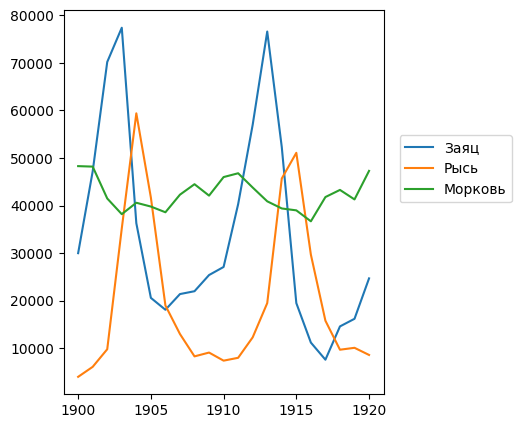

In [42]:
plt.axes([0.2, 0.1, 0.5, 0.8]) 
plt.plot(year, hares, year, lynxes, year, carrots) 
plt.legend(('Заяц', 'Рысь', 'Морковь'), loc=(1.05, 0.5))

# Задание 3. Множество Мандельброта.

/tmp/ipykernel_18496/700411898.py:13: RuntimeWarning: overflow encountered in square
  z=z**2+c
/tmp/ipykernel_18496/700411898.py:13: RuntimeWarning: invalid value encountered in square
  z=z**2+c


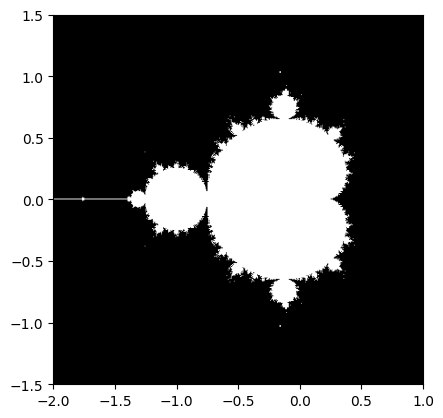

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis

def compute_maldelbrot(N_max, some_threshold, nx, ny):
    x= np.linspace(-2,1, nx)
    y=np.linspace(-1.5,1.5, ny)

    c=x[:,newaxis]+1j*y[newaxis, :]

    z = c
    for j in range(N_max):
        z=z**2+c
    mandelbrot_set = (abs(z) < some_threshold)   

    return mandelbrot_set

mandelbrot_set = compute_maldelbrot(50,50,601,401)

plt.imshow(mandelbrot_set.T, extent=[-2,1,-1.5,1.5])
plt.gray()